# WGAN-GP Training

## imports

In [24]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_celeb
import pickle


In [25]:
# run params
SECTION = 'gan'
RUN_ID = '0004'
DATA_NAME = 'neo'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [26]:
BATCH_SIZE = 128
IMAGE_SIZE = 128

In [27]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 821 images belonging to 1 classes.


In [28]:
x_train[0][0][0]

array([[[0.8980392 , 0.8901961 , 0.85882354],
        [0.8117647 , 0.7176471 , 0.62352943],
        [0.7411765 , 0.64705884, 0.5372549 ],
        ...,
        [0.8509804 , 0.8039216 , 0.70980394],
        [0.8901961 , 0.85882354, 0.7882353 ],
        [0.96862745, 0.96862745, 0.9843137 ]],

       [[0.69411767, 0.6862745 , 0.64705884],
        [0.9764706 , 0.8117647 , 0.6627451 ],
        [0.99215686, 0.75686276, 0.5529412 ],
        ...,
        [0.69411767, 0.5294118 , 0.39607844],
        [0.92941177, 0.7882353 , 0.6784314 ],
        [0.8745098 , 0.8745098 , 0.85882354]],

       [[0.67058825, 0.67058825, 0.60784316],
        [0.9607843 , 0.7882353 , 0.62352943],
        [0.96862745, 0.8039216 , 0.5764706 ],
        ...,
        [1.        , 0.8117647 , 0.5921569 ],
        [1.        , 0.8509804 , 0.6627451 ],
        [0.7019608 , 0.7176471 , 0.6313726 ]],

       ...,

       [[0.9372549 , 0.9137255 , 0.85882354],
        [0.92156863, 0.75686276, 0.54509807],
        [0.90588236, 0

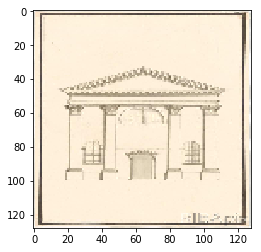

In [29]:
plt.imshow((x_train[0][0][0]+1)/2)

## architecture

In [32]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (8, 8, 512) # change for output size
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))




In [33]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 128, 128, 3)       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 64, 64, 64)        4864      
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 64, 64, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 32, 32, 128)       204928    
_________________________________________________________________
leaky_re_lu_50 (LeakyReLU)   (None, 32, 32, 128)       0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 16, 16, 256)       819456    
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, 16, 16, 256)       0         
__________

In [34]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 32768)             3309568   
_________________________________________________________________
batch_normalization_25 (Batc (None, 32768)             131072    
_________________________________________________________________
leaky_re_lu_53 (LeakyReLU)   (None, 32768)             0         
_________________________________________________________________
reshape_7 (Reshape)          (None, 8, 8, 512)         0         
_________________________________________________________________
up_sampling2d_25 (UpSampling (None, 16, 16, 512)       0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 16, 16, 256)       3277056   
__________

## training

In [35]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
BATCH_SIZE = 

In [36]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

ValueError: All input arrays (x) should have the same number of samples. Got array shapes: [(128, 128, 128, 3), (64, 100)]

In [ ]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()
